<H3>
1. Import Relevant Libraries

In [1]:
import sqlite3
from collections import Counter

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

<H3> 2. Retrieve data from file - "survive.db"

In [2]:
conn = sqlite3.connect('data/survive.db')
df = pd.read_sql_query("SELECT * from survive", conn)
df = df.rename(columns={'Pletelets': 'Platelets'})
df = df.rename(columns={'Creatinine phosphokinase': 'Creatine phosphokinase'})
df

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,91MBFV,0,Male,Yes,Normal,50,Low,140,0.9,362000.0,298,109,11.8,178,51,blue
14996,3BK9WM,1,Male,Yes,Normal,62,Low,140,0.9,253000.0,231,141,14.6,171,114,green
14997,01ZP6F,0,Female,No,Normal,61,Low,141,0.9,229000.0,84,173,9.2,156,71,blue
14998,JMSGEG,0,Male,No,Normal,77,Low,137,1.1,406000.0,109,154,11.3,130,32,red


<H3> 3. Display column information - Numerical Data
<H5> Gives insights into data types and existence of missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      15000 non-null  object 
 1   Survive                 15000 non-null  object 
 2   Gender                  15000 non-null  object 
 3   Smoke                   15000 non-null  object 
 4   Diabetes                15000 non-null  object 
 5   Age                     15000 non-null  int64  
 6   Ejection Fraction       15000 non-null  object 
 7   Sodium                  15000 non-null  int64  
 8   Creatinine              14501 non-null  float64
 9   Platelets               15000 non-null  float64
 10  Creatine phosphokinase  15000 non-null  int64  
 11  Blood Pressure          15000 non-null  int64  
 12  Hemoglobin              15000 non-null  float64
 13  Height                  15000 non-null  int64  
 14  Weight                  15000 non-null

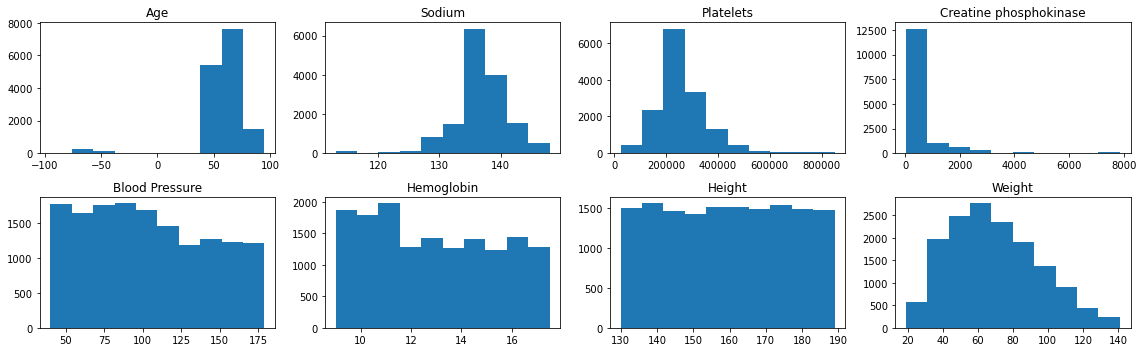

In [4]:
df.info()
num_cols = ['Age', 'Sodium', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight']
fig, axs = plt.subplots(2, 4, figsize=(16,5))
count = 0
for x in [0, 1]:
    for y in range(4):
        axs[x, y].hist(df[num_cols[count]])
        axs[x, y].set_title(num_cols[count])
        count+=1
fig.tight_layout()

<H5> Two identifiable issues: are null datapoints for "Creatinine" and the presence of negative values for "Age"

<H3> 4. Address Missing/Erronous Data and Outliers - Numerical Data
<H4> 4.1 Addressing Null Data
<H5> 4.1.1 Examine distribution for column in concern
<H5> As there are Null values in the creatinine coloumn, studying the skew of data with a box-plot helps determine an appropriate replacement strategy

<AxesSubplot:xlabel='Creatinine'>

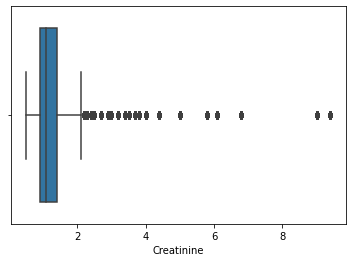

In [3]:
sns.boxplot(x=df.Creatinine)

<H5> 4.1.2 Missing value imputation
<H5> Replace missing values for 'Creatinine' with median as box demonstrates that data is skewed

<AxesSubplot:xlabel='Creatinine'>

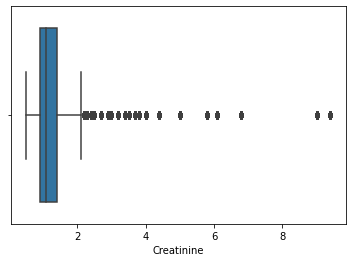

In [4]:
df_nfix = df
df_nfix['Creatinine'] = df['Creatinine'].fillna(df['Creatinine'].median())
sns.boxplot(x=df_nfix.Creatinine)

<H4> 4.2 Erronous Value Correction
<H5> Negative values are present in age. As the cause cannot be verified presently, it may be assumed positive values were erronously recorded as negative and are corrected accordly.

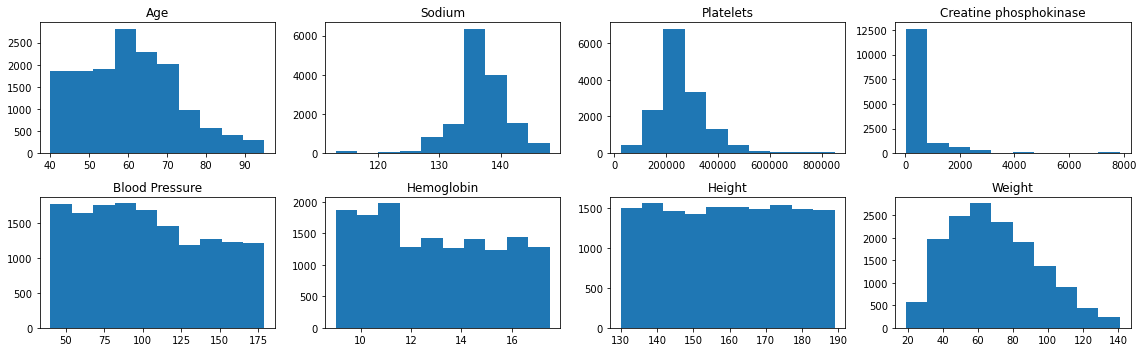

In [5]:
df_nfix["Age"] = abs(df_nfix["Age"])
num_cols = ['Age', 'Sodium', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight']
fig, axs = plt.subplots(2, 4, figsize=(16,5))
count = 0
for x in [0, 1]:
    for y in range(4):
        axs[x, y].hist(df_nfix[num_cols[count]])
        axs[x, y].set_title(num_cols[count])
        count+=1
fig.tight_layout()

Notes: 
Normal levels for sodium are between 120 and 160mmol/L. As the conversion is 1mg/dL to 0.44mmol/L it would be necessary to verify the unit (mg/dL) provided. For the purpose of analysis it will be assumed values are measured in mmol/L. 

Normal platelet counts range between 150 000 to 400 000 platelets/microlitre(mcl), so this analysis will assume it is measured in platelets/mcl.

Information concerning creatine phospokinase seems (CPK) to suggest that the normal values are 10 to 120 mcg/L. It is therefore hard to ascertain the units utilized to measure CPK given a range of 0-8000. Further verification will be useful for a more in depth data analysis. 

Whether systolic and diastolic measures of blood pressure are provided is important for categorizing low and high blood pressure. This would be clarified to assist the EDA process. In either case it appears that patients are positive for hypertension and hypotension.

<H5>References:<H5> 
    
https://www.sgh.com.sg/patient-care/specialties-services/pathology/pages/critical-test-results-and-laboratory-values.aspx
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4008117/

<H4> 4.3 Outlier detection </H4>
<H5> 4.3.1 Extract outlier values </H5>
The function adopts Tukey's rule for outliers within each column (outliers have values more than 1.5 times the interquartile range from the quartiles). 

In [6]:
def outlierdetect(df_nfix, columns):
    ol_indices = []
    outlier_dfs = {}
    for col in columns:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqrange = q3 - q1
        allowance = iqrange * 1.5
        ol_vals = df[(df[col] < q1 - allowance) | (df[col] > q3 + allowance)]
        ol_present = ol_vals.shape[0]
        print(col, ":", ol_present)
        if ol_present > 0:
            outlier_dfs[col] = ol_vals
    return outlier_dfs

outliers = outlierdetect(df_nfix, num_cols)
#len(outliers)
#print(outliers)

Age : 0
Sodium : 185
Platelets : 941
Creatine phosphokinase : 1483
Blood Pressure : 0
Hemoglobin : 0
Height : 0
Weight : 0


<H5> 4.3.2 Examine outlier values </H5>
Histogram charts to examine outlier values for abnoralities
   

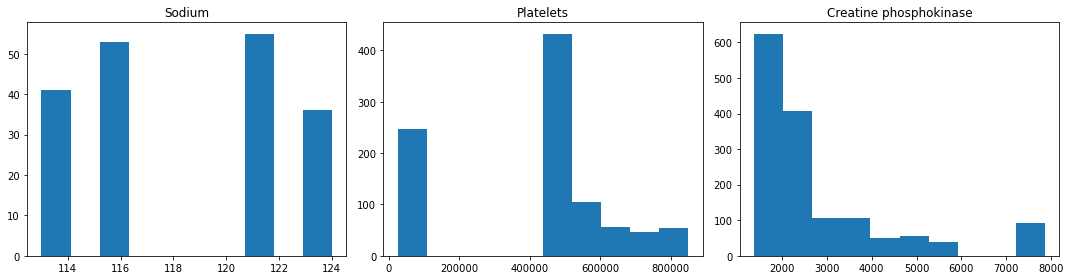

In [7]:
num_cols = ['Sodium', 'Platelets', 'Creatine phosphokinase']
fig, axs = plt.subplots(1, 3, figsize=(15,4))
count = 0
for y in range(3):
    ol_frame = outliers[num_cols[count]]
    axs[y].hist(ol_frame[num_cols[count]])
    axs[y].set_title(num_cols[count])
    count+=1
fig.tight_layout()

<H4> Insights </H4>
<H5> Sodium: </H5>
Assuming sodium levels are measured in mmol/l, levels below 135 mmol/l indicate hyponatermia with an acute exacerbation occuring when levels go below 110 mmol/l. Outliers are above 110 mmol/l, they need not be removed from analysis as the values do not seem to indicate equipment/personnel error, but the presence of hyponatremia (<135mmol/l) and hypernatremia (>145mmol/l) in 4.2 may be correlated with survival categorically, examination can be performed.
   
   1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2600061/#:~:text=Hyponatraemia%20is%20defined%20as%20a,into%20euvolaemic%2C%20hypervolaemic%20and%20hypovolaemic.
2. https://www.nejm.org/doi/full/10.1056/nejm200005183422006

    
<H5> Platelet counts: </H5>
Assuming platelet counts are measured in platelets/mcl. A number of patients seem to be positive for thrombocytopenia (150 000 platelets/mcl) and thrombocytosis (450 000 platelets/mcl). As these factors are independently correlated with survival a categorical examination appears to be necessary. The values will not be removed from analysis.
    
    
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4008117/
    
<H5> Creatine Phospokinase: </H5>
Sufficient information concerning the units utilized for this measurement are unavailable and clarification would be necessary. Treating outliers without a proper basis negates the prospect of gaining useful insights and is not recommended as such.

<H3> 5. Categorical Data Treatment
<H4> 5.1 Display categories used for each variable and identify inconsistencies  

In [8]:
cat_cols = ['Survive','Gender','Smoke','Diabetes','Ejection Fraction','Favorite color']
for col in cat_cols:
    print(df_nfix[col].value_counts(dropna=False),'\n')

0      9581
1      4552
No      604
Yes     263
Name: Survive, dtype: int64 

Male      9757
Female    5243
Name: Gender, dtype: int64 

No     9710
Yes    4707
NO      399
YES     184
Name: Smoke, dtype: int64 

Normal          8789
Pre-diabetes    3124
Diabetes        3087
Name: Diabetes, dtype: int64 

Low       12734
Normal     1658
L           482
N            66
High         60
Name: Ejection Fraction, dtype: int64 

blue      2532
yellow    2530
green     2507
red       2491
white     2476
black     2464
Name: Favorite color, dtype: int64 



The Survive variable has categories 0, 1 and No and Yes. Replacements for No and Yes will be done to 0 and 1 in line with the list of attributes. The Smoke variable has categories No and Yes and NO and YES in capital letters, this analysis will follow the format: No and Yes. The Ejection Fraction has categories Low, Normal, High as well as L and N. It can be assumed that Low refers to Low and N refers to Normal, however this should be verified as N may also refer to Null/NA. For this analysis L will be replaced with Low and N will be replaced with Normal.
<br>    
It is also observed that the data is imbalanced for several classes, (e.g. more than twice the number of normal cases vs pre-diabetes/diabetes for the diabetest features, and significantly larger number of patients with low ejection fraction than normal or high). 

<H4> 5.2 Correct inconcistencies and ensure uniformity for categorical data classes

In [9]:
df_cnfix = df_nfix
df_cnfix['Survive'].replace({'No':0,'Yes':1,'0':0,'1':1},inplace=True)
df_cnfix['Smoke'].replace({'NO':'No','YES':'Yes'},inplace=True)
df_cnfix['Ejection Fraction'].replace({'L':'Low','N':'Normal'},inplace=True)
for col in cat_cols:
    print(df_cnfix[col].value_counts(dropna=False),'\n')

0    10185
1     4815
Name: Survive, dtype: int64 

Male      9757
Female    5243
Name: Gender, dtype: int64 

No     10109
Yes     4891
Name: Smoke, dtype: int64 

Normal          8789
Pre-diabetes    3124
Diabetes        3087
Name: Diabetes, dtype: int64 

Low       13216
Normal     1724
High         60
Name: Ejection Fraction, dtype: int64 

blue      2532
yellow    2530
green     2507
red       2491
white     2476
black     2464
Name: Favorite color, dtype: int64 



<H2>6. Data Analysis - Categorical Features

In [10]:
cat_features = ['Gender','Smoke','Diabetes','Ejection Fraction','Favorite color']
df_cnfix.head(2)

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black


<H4> 6.1 Compare means of survival for every class 
<H5> 6.1.1 Determines if survival probability is different for patients from each class

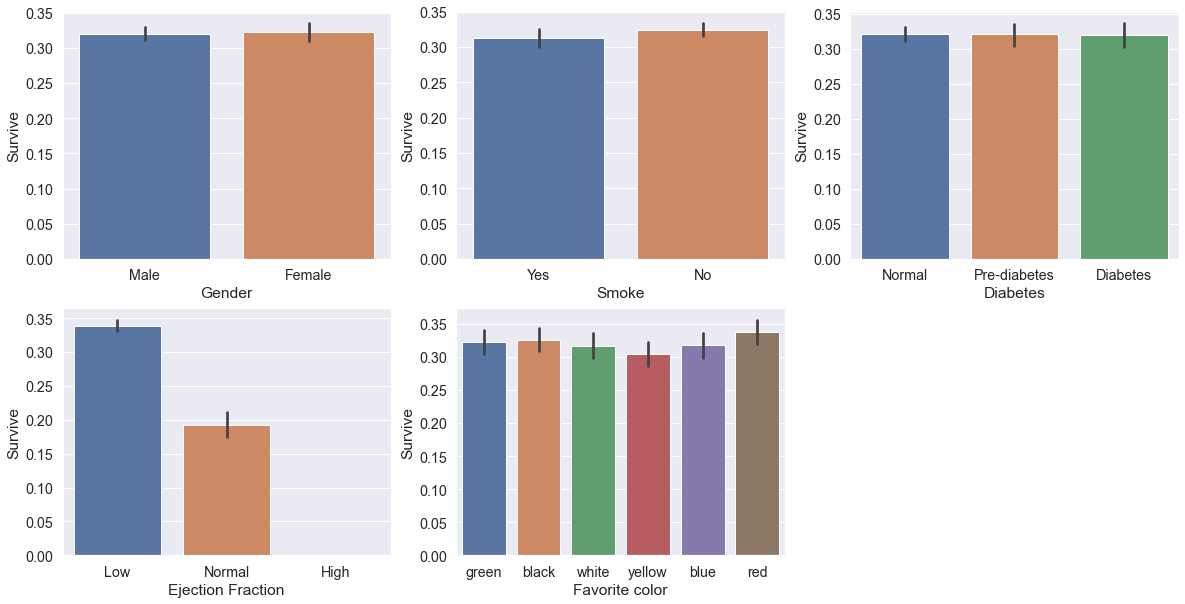

In [11]:
count = 0
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1.3)
for f in cat_features:
    plt.subplot(2, 3, count+1)
    sns.barplot(x = f, y = 'Survive', data = df_cnfix)
    count=count+1

<H4> Insights: </H4>
Survival probabilty does not seem to significantly vary for classes beyond the ejection fraction, with survival probabilty decreasing from low to normal to high. It should however be noted that the distribution of data in this class is Low: 13216, Normal: 1724, High: 60, the data is imbalanced and training on this dataset may lead to a biased classifier. This data may also not be representative for patients with coronary artery disease

<H2>7. Data Analysis - Numerical Features

In [12]:
numerical = df_cnfix.drop(['ID','Gender','Smoke','Diabetes','Ejection Fraction','Favorite color'], axis=1)

<H4> 7.1 Quick plots to examine correlation </H4>
<H5> 7.1.1 Correlation heatmap </H5>
Allows for a quick examination of postive or negative correlations numerical features and survival. The pearson correlation coefficient is utilized. 

<AxesSubplot:>

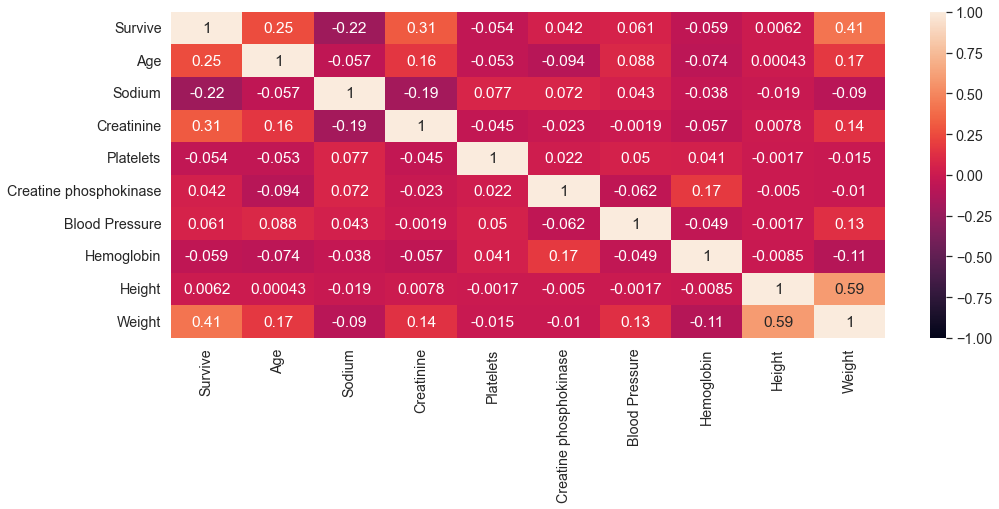

In [13]:
plt.figure(figsize=(16, 6))
correlation = numerical.corr('pearson')
sns.heatmap(correlation,vmin=-1, vmax=1, annot=True)

<H4> Insights: </H4>
Weak positive correlations are observed between survival and age/creatinine/weight. There is also a positive correlation between weight and height, which is to be expected if patients possess reasonable body mass indexes - which can be examined further

<H5> 7.1.2 Correlation heatmap - Adding Body Mass Index (BMI) </H5>
Calculated from the height and weight variables, BMI is more meaningful in clinical settings for the evaluation of a patient's general health

<AxesSubplot:>

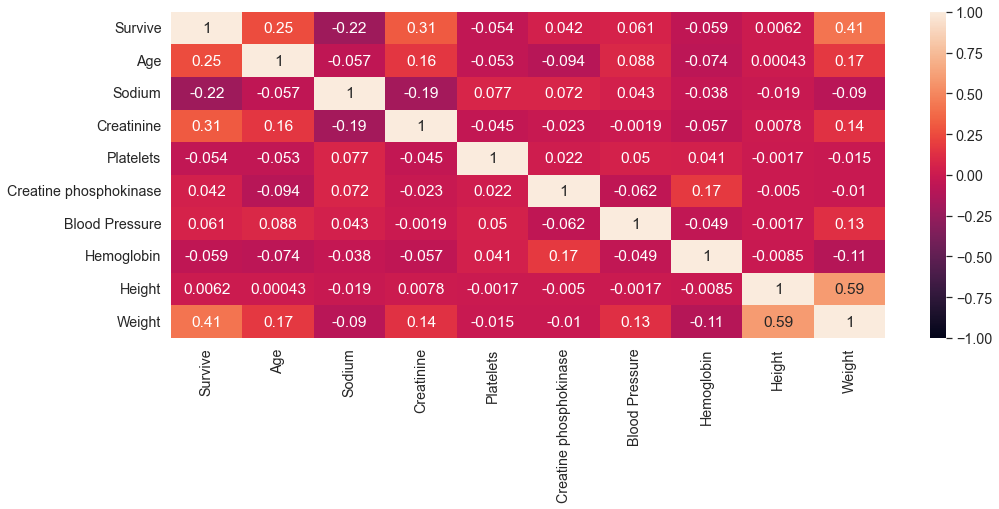

In [14]:
df_cnfix['BMI'] = bmi = df_cnfix.apply(lambda x: (x.Weight/((x.Height/100)**2)), axis=1)
correlation = numerical.corr('pearson')
plt.figure(figsize=(16, 6))
sns.heatmap(correlation,vmin=-1, vmax=1, annot=True)

<H4> Insights: </H4>
The BMI variable is observed to positively correlate with survival with a stronger correlation than the weight variable. It may be interesting to explore this correlation further.

<H5> 7.1.2 Bar pots, with a cross-examination using ejection fraction </H5>
It was observed in 6.1.1 that patients with a lower ejection fraction were more likely to survive. It would be interesting to to see if this further correlates with numerical variables to predict survival. 

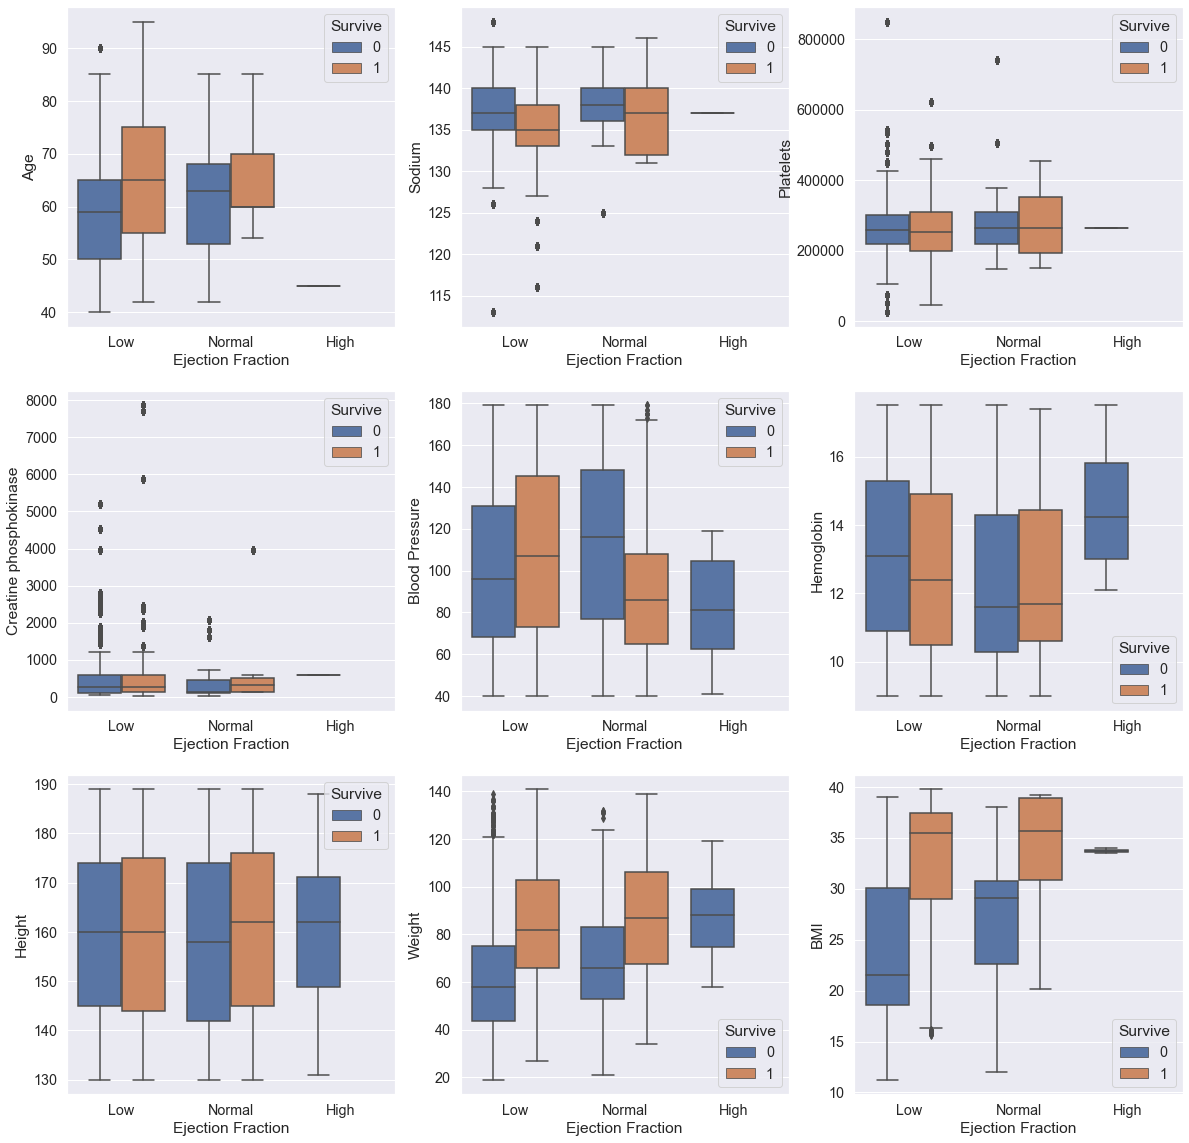

In [15]:
num_features = ['Age', 'Sodium', 'Platelets', 'Creatine phosphokinase', 'Blood Pressure', 'Hemoglobin', 'Height', 'Weight', 'BMI']
count = 0
plt.figure(figsize = (20, 20))
sns.set(font_scale = 1.3)
for f in num_features:
    plt.subplot(3, 3, count+1)
    sns.boxplot(x = 'Ejection Fraction', y = f, data = df_cnfix, hue="Survive")
    count=count+1

<H4> Insights: </H4>
An interesting result is observed. Patients with Low and Normal ejection fractions were more likely to survive if their BMI was above 30, which falls within the obese category. The BMI and Ejection fraction may be used in conjunction for feature engineering to better predict survival outcomes. 

<H5> 7.1.3 Feature Engineering - Ordinal Variables: Sodium and Platelets </H5>
As discussed in 4.3.2, normal sodium levels, as well as hyponatremia (<135mmol/l) and hypernatremia (>145mmol/l) in may be correlated with survival categorically. 
</br> This may also be true for normal platelet counts, thrombocytopenia (150 000 platelets/mcl) and thrombocytosis (450 000 platelets/mcl). 
</br> This section finally aims to study these conditions categorically to see if they are associated with the survival probability of coronary artery disease patients

<AxesSubplot:xlabel='Plcount', ylabel='Survive'>

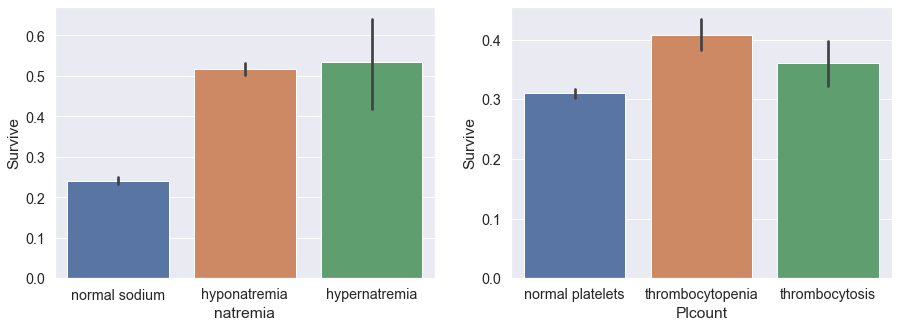

In [24]:
dataset = df_cnfix
dataset.head()
dataset.loc[dataset['Sodium'] < 135, 'natremia'] = 'hyponatremia'
dataset.loc[(dataset['Sodium'] >= 135) & (dataset['Sodium'] <= 145), 'natremia'] = 'normal sodium'
dataset.loc[dataset['Sodium'] > 145, 'natremia'] = 'hypernatremia'


dataset.loc[dataset['Platelets'] < 150000, 'Plcount'] = 'thrombocytopenia'
dataset.loc[(dataset['Platelets'] >= 150000) & (dataset['Platelets'] <= 450000), 'Plcount'] = 'normal platelets'
dataset.loc[dataset['Platelets'] > 450000, 'Plcount'] = 'thrombocytosis'

plt.figure(figsize = (15, 5))
sns.set(font_scale = 1.3)

plt.subplot(1, 2, 1)
sns.barplot(x = 'natremia', y = 'Survive', data = df_cnfix)
plt.subplot(1, 2, 2)
sns.barplot(x = 'Plcount', y = 'Survive', data = df_cnfix)

From comparing the means of survival, it is evident that patients with hyponatremia or hypernatremia have a higher probability of survival than patients with normal sodium levels in their blood syrum. This differentiation is not observed with platelet counts. The use of ordinal variables for machine learning with sodium content may improve machine learning results.